In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [13]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

C:\Users\g_gerasimov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [14]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
model = RandomForestRegressor(max_depth=12,  random_state=42)
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.8422026724370548

Так как при использовании метрики R^2 показатель вероятности выше, чем при использовании линейной регрессии, мы можем сделать вывод, что в данном конкретном случае, данная метрика подходит больше.

#                                     Задание номер 3

In [37]:
fi = model.feature_importances_
fl = list(X_train.columns)
feature_result = pd.DataFrame({"Feature": fl, "Feature_important": fi})
feature_result = feature_result.sort_values("Feature_important", ascending=False).reset_index(drop=True)

<AxesSubplot:ylabel='Feature'>

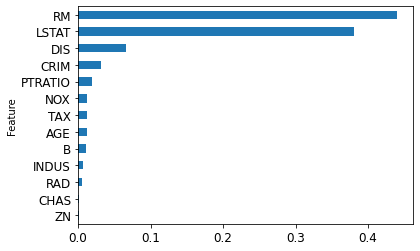

In [45]:
f = feature_result.groupby("Feature")["Feature_important"].sum().sort_values()
f.plot(kind="barh", fontsize=12)

Признаки RM(0.439920) и LSTAT(0.380769) имеют наибольшую важность.